In [8]:
#Defining the DataSet
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from sklearn.datasets import make_blobs
import math
from math import pi
import numpy as np


SEED = 123
#qasm_sim = AerSimulator()
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In [9]:
n_samples=50
a = 2
b = -2

x1, _ = datasets.make_gaussian_quantiles(mean = [2*a,2*a], cov=2.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x2, _ = datasets.make_gaussian_quantiles(mean = [1*a,1*b], cov=3.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x3, _ = datasets.make_gaussian_quantiles(mean = [1*b,1*a], cov=5.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x4, _ = datasets.make_gaussian_quantiles(mean = [4*b,4*b], cov=6.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)

y1 = np.array([0 for i in range(n_samples)])
y2 = np.array([1 for i in range(n_samples)])
y3 = np.array([2 for i in range(n_samples)])
y4 = np.array([3 for i in range(n_samples)])

x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))
#print(x)

In [10]:
# Normalizatin
x[:,0] = x[:,0] / (np.max(x[:,0]) - np.min(x[:,0]))
x[:,1] = x[:,1] / (np.max(x[:,1]) - np.min(x[:,1]))

num_classes = 4
num_features = 2
adhoc_dimension = 2
x_blue = x[y==0]
x_red = x[y==1]
x_green = x[y==3]
x_m = x[y==4]

test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=SEED, stratify=y)

In [11]:
# def plot_dataset(x_train, y_train,x_test, y_test):

# # train_features, train_labels, test_features, test_labels
#     plt.figure(figsize=(5, 5))
#     plt.ylim(-1, 1)
#     plt.xlim(-1, 1)
#     # plt.imshow(
#     #     np.asmatrix(adhoc_total).T,
#     #     interpolation="nearest",
#     #     origin="lower",
#     #     cmap="RdBu",
#     #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
#     # )

#     # A train plot
#     plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

#     # B train plot
#     plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

#     # C train plot
#     plot_features(plt, x_train,  y_train, 2, "v", "w", "g", "C train")

#     # D train plot
#     plot_features(plt, x_train,  y_train, 3, "D", "w", "m", "D train")

#     # A test plot
#     plot_features(plt, x_test, y_test, 0, "s", "b", "w", "A test")

#     # B test plot
#     plot_features(plt, x_test, y_test, 1, "o", "r", "w", "B test")

#     # C test plot
#     plot_features(plt, x_test, y_test, 2, "v", "g", "w", "A test")

#     # D test plot
#     plot_features(plt, x_test, y_test, 3, "D", "m", "w", "B test")

#     plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
#     plt.title("Ad hoc dataset")

#     plt.show()


# plot_dataset(x_train, y_train,x_test, y_test)

In [46]:
# Plot of the dataset

def plot_features(plt, features, labels, class_label, marker, face, edge, label):
    # A train plot
    plt.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset_train(x_train, y_train):

# train_features, train_labels, test_features, test_labels
    plt.figure(figsize=(5, 5))
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    # A train plot
    plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_train,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_train,  y_train, 3, "p", "w", "y", "D train")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    #plt.show()



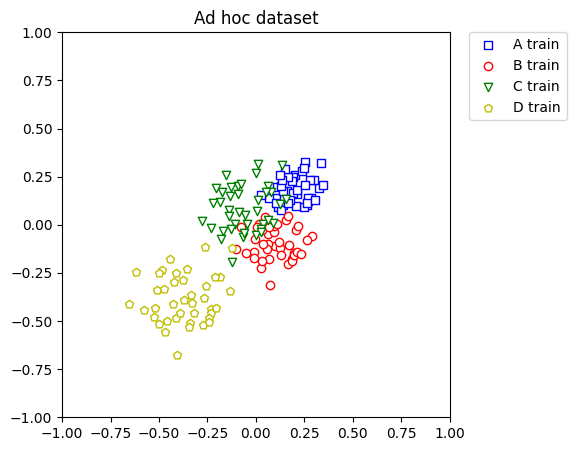

In [47]:
plot_dataset_train(x_train, y_train)

In [14]:
def get_datanew(n):
    n_samples = n
    a = 2
    b = -2
    
    x1, _ = datasets.make_gaussian_quantiles(mean = [2*a,2*a], cov=2.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
    x2, _ = datasets.make_gaussian_quantiles(mean = [1*a,1*b], cov=3.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
    x3, _ = datasets.make_gaussian_quantiles(mean = [1*b,1*a], cov=5.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
    x4, _ = datasets.make_gaussian_quantiles(mean = [4*b,4*b], cov=6.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
    
    y1 = np.array([0 for i in range(n_samples)])
    y2 = np.array([1 for i in range(n_samples)])
    y3 = np.array([2 for i in range(n_samples)])
    y4 = np.array([3 for i in range(n_samples)])
    
    x = np.concatenate((x1, x2, x3, x4))
    y = np.concatenate((y1, y2, y3, y4))

    # Normalizatin
    x[:,0] = x[:,0] / (np.max(x[:,0]) - np.min(x[:,0]))
    x[:,1] = x[:,1] / (np.max(x[:,1]) - np.min(x[:,1]))
    
    return x,y

In [15]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    # plt.xlim(0,1)
    # plt.ylim(0,1)
    #plt.show()

In [26]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1], marker='*', s=100, c = 'mediumvioletred')
    # plt.xlim(0,1)
    # plt.ylim(0,1)
    #plt.show()

In [27]:
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [28]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [29]:
def find_nearest_neighbour(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_distance(points[i,:],centroids[j,:])
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

In [30]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
   
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

In [31]:

# def preprocess(points):
#     n = len(points)
#     x = 30.0*np.sqrt(2)
#     for i in range(n):
#         points[i,:]+=15
#         points[i,:]/=x
    
#     return points

/var/folders/6b/g237s35n6r99p3mmttv11hvh0000gn/T/ipykernel_69921/2319224865.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

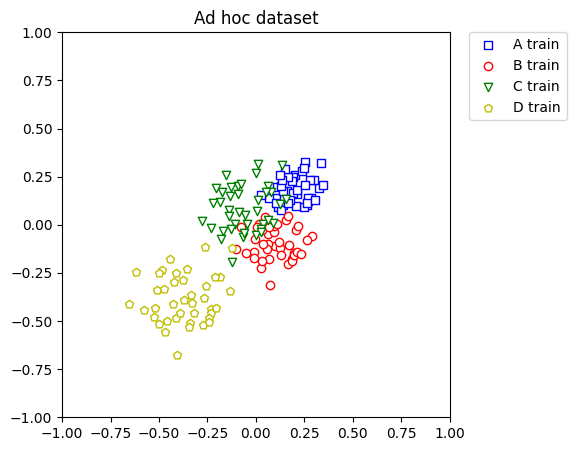

<Figure size 640x480 with 0 Axes>

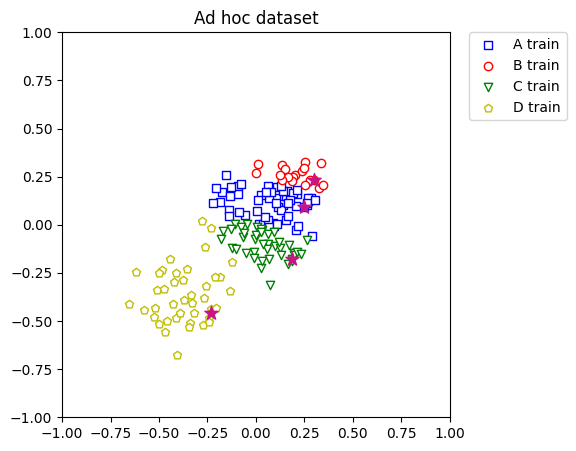

<Figure size 640x480 with 0 Axes>

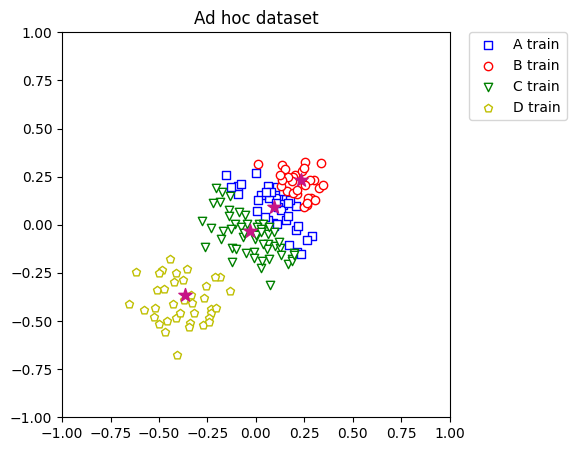

<Figure size 640x480 with 0 Axes>

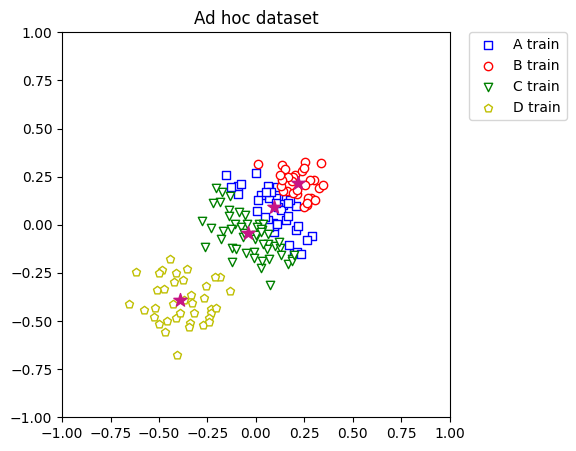

<Figure size 640x480 with 0 Axes>

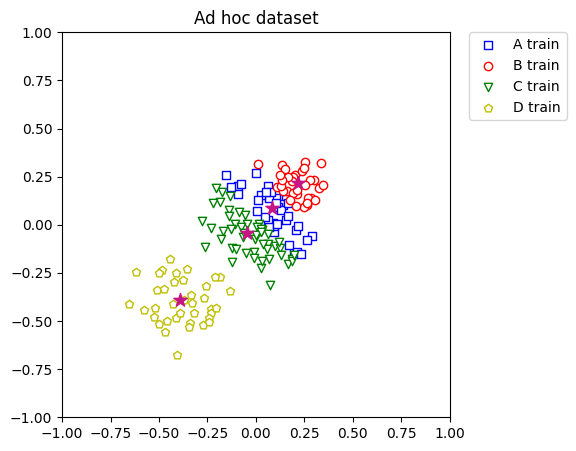

<Figure size 640x480 with 0 Axes>

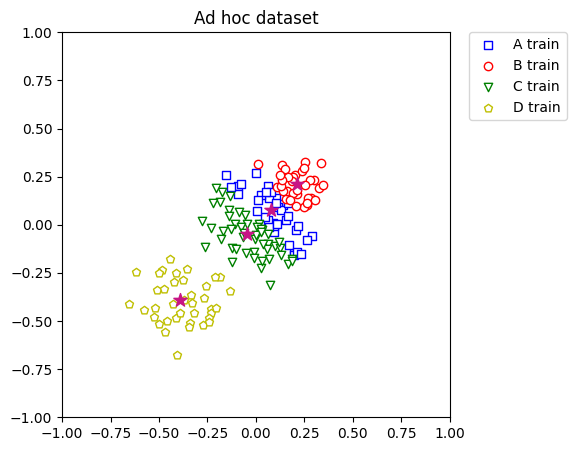

<Figure size 640x480 with 0 Axes>

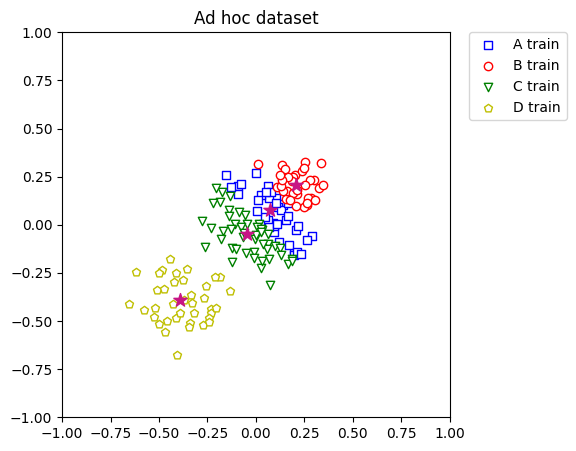

<Figure size 640x480 with 0 Axes>

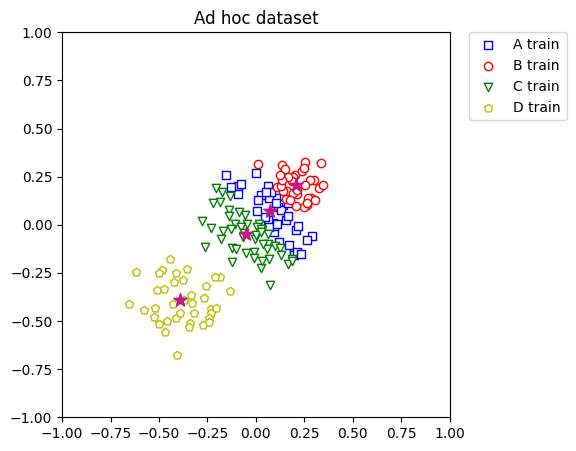

<Figure size 640x480 with 0 Axes>

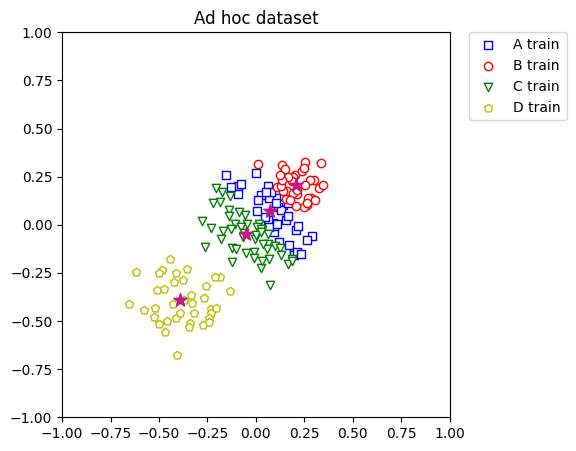

<Figure size 640x480 with 0 Axes>

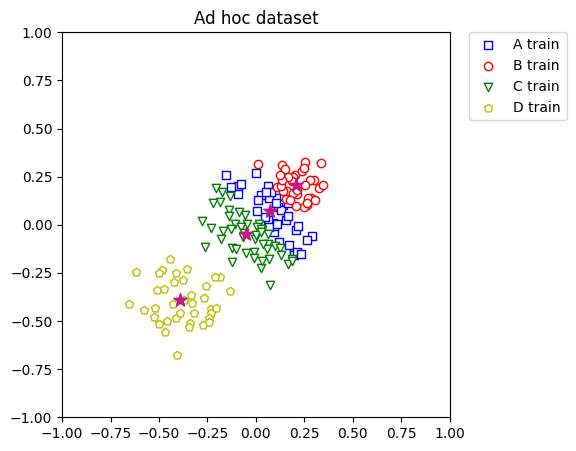

<Figure size 640x480 with 0 Axes>

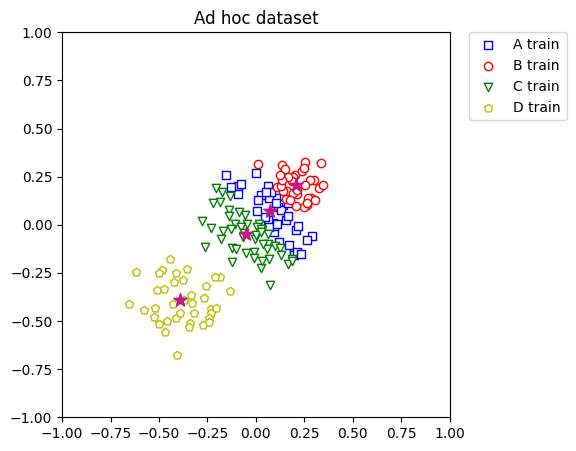

In [39]:
n = 50      # number of data points
k = 4        # Number of centers
# std = 2      # std of datapoints

#points,o_centers = get_datanew(n)       #dataset
points = x_train
o_centers = y_train
#points = preprocess(points)                # Normalize dataset
plt.figure()                                  
##draw_plot(points,o_centers,label=False)
plot_dataset_train(points,o_centers)

centroids = initialize_centers(points,k)   # Intialize centroids
# run k-means algorithm
for i in range(10):
    
    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    #draw_plot(points,centers)
    plot_dataset_train(points,centers)
    plot_centroids(centroids)
    centroids = find_centroids(points,centers) 
    plt.savefig(f'/Users/negarseif/Documents/QML_workshop/Git-4Qbits/ani{i}.png', bbox_inches='tight')

MovieWriter imagemagick unavailable; using Pillow instead.


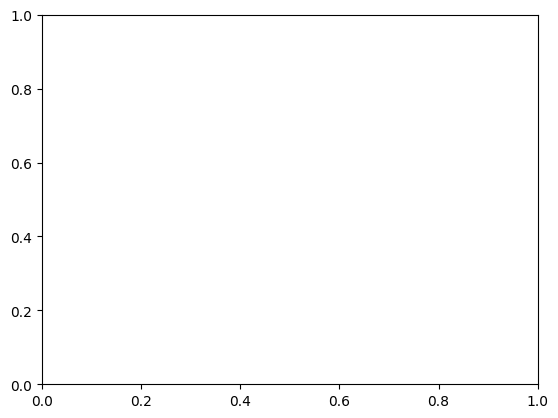

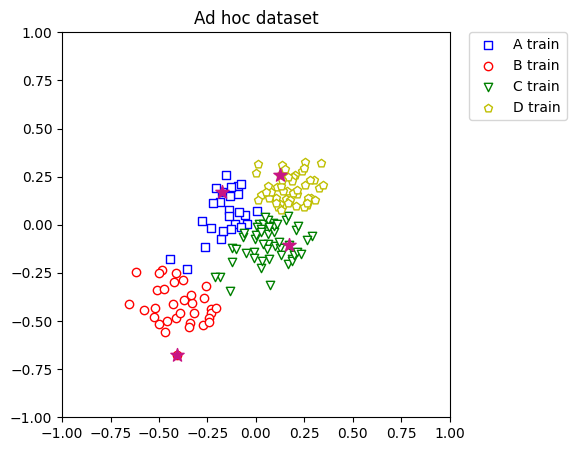

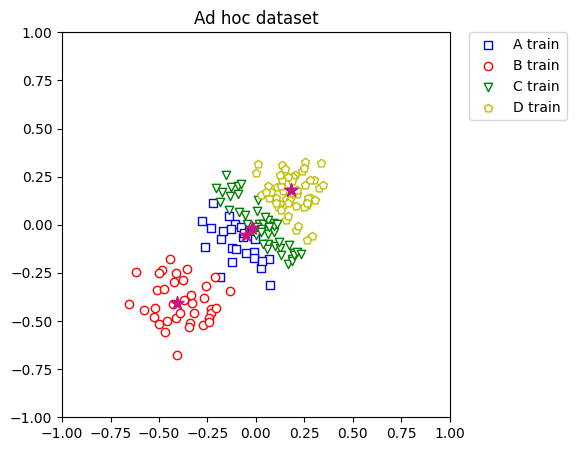

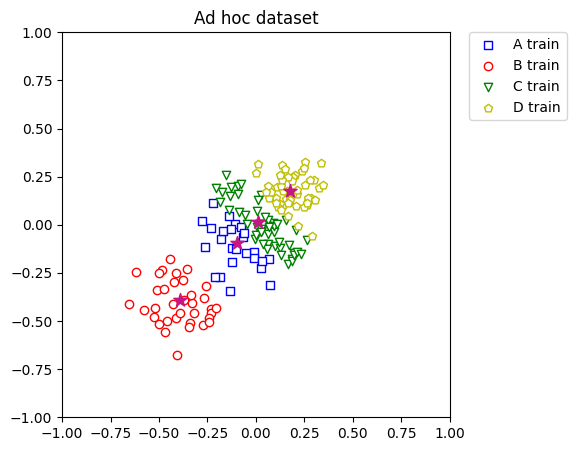

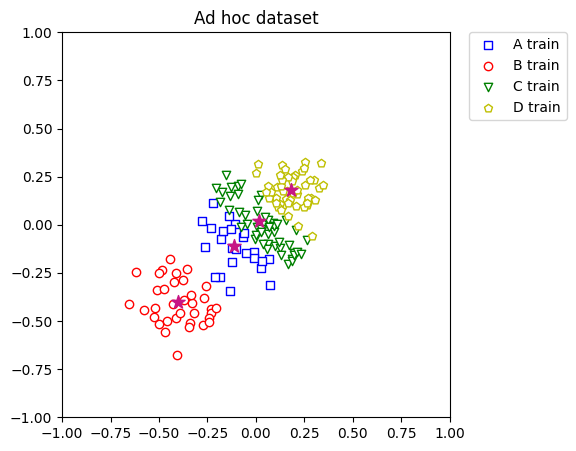

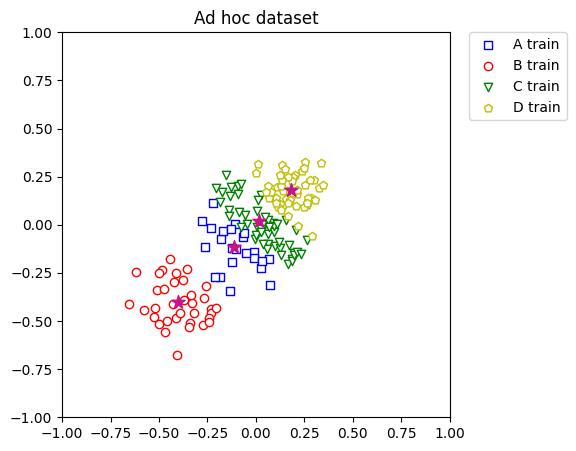

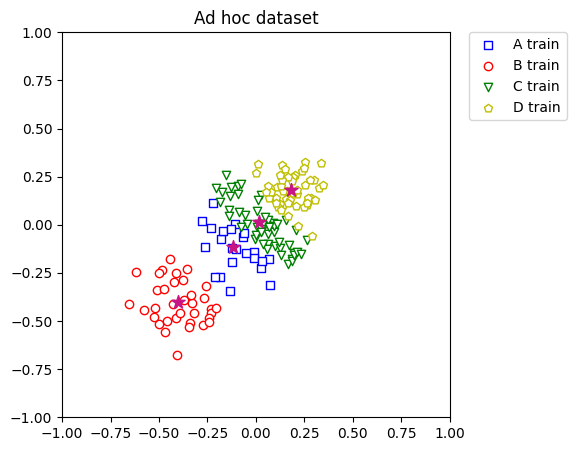

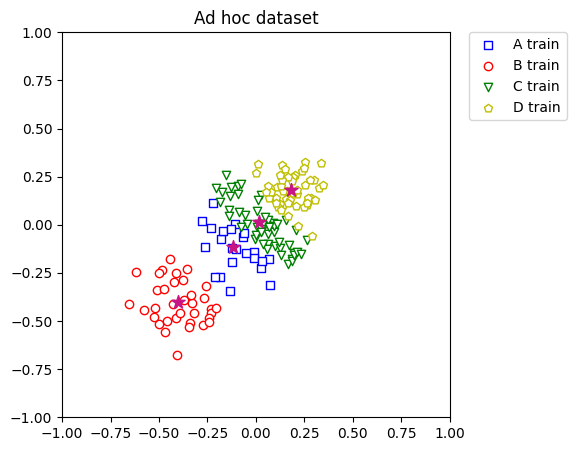

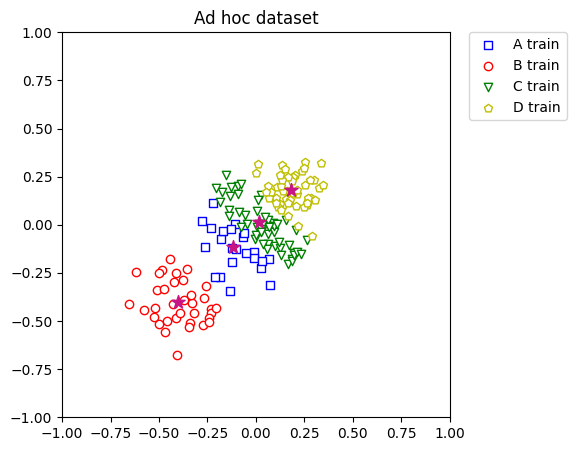

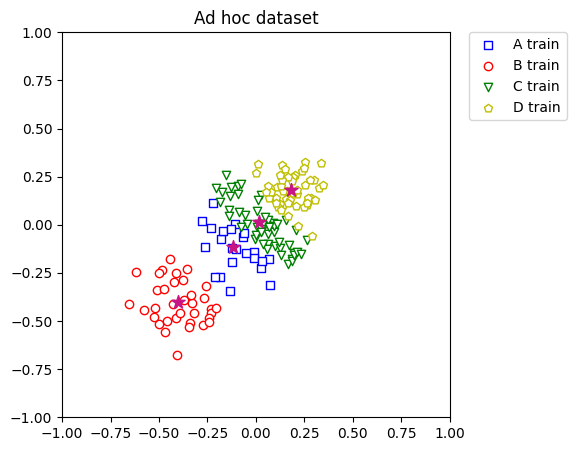

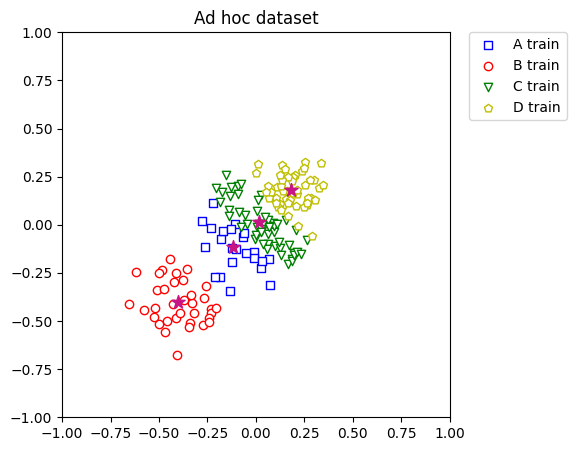

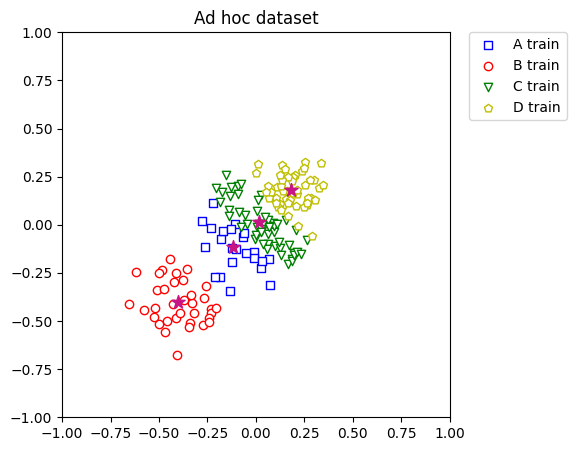

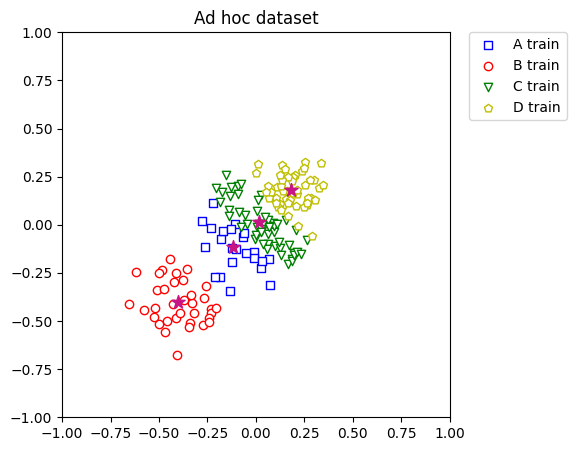

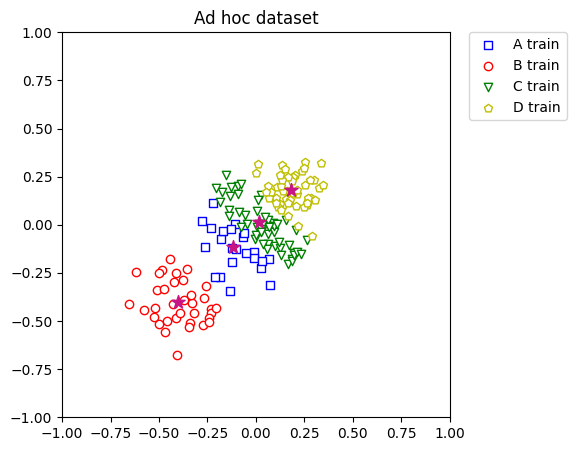

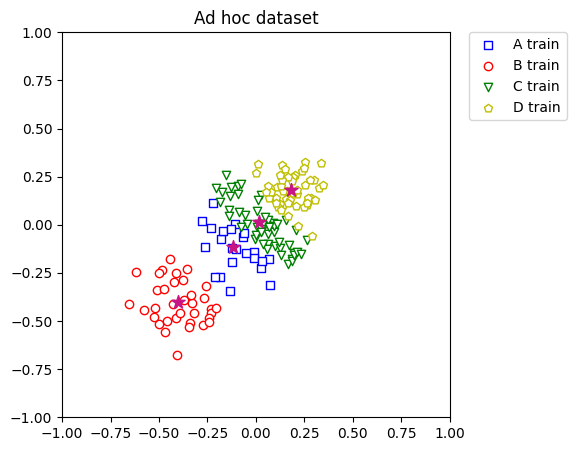

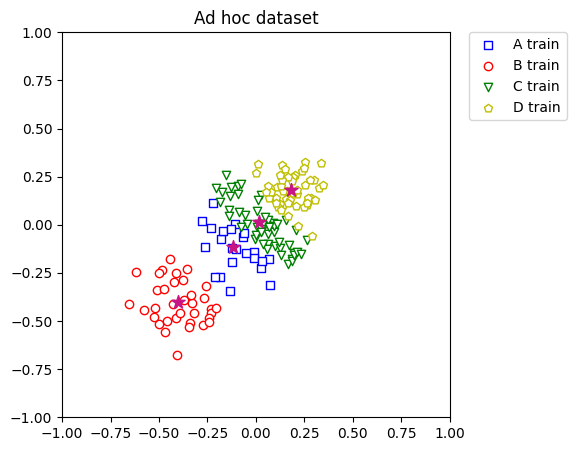

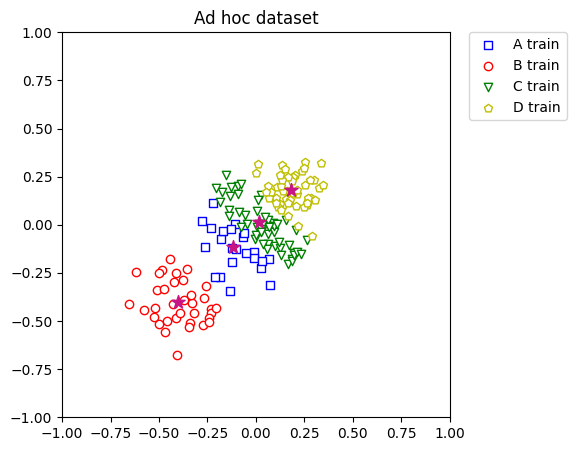

In [35]:
from matplotlib.animation import FuncAnimation


points = x_train
o_centers = y_train
centroids = initialize_centers(points, k)

fig, ax = plt.subplots()

# def update(frame):
#     ax.clear()
#     global centroids  # Use global to modify the centroids defined outside the function
#     centers = find_nearest_neighbour(points, centroids)
#     plot_dataset_train(points, centers)
#     plot_centroids(centroids)
#     centroids[:] = find_centroids(points, centers)  # Update centroids for next frame

# ani = FuncAnimation(fig, update, frames=15, repeat=True)


def update(frame):
    ax.clear()
    centers = find_nearest_neighbour(points, centroids)
    plot_dataset_train(points, centers)
    plot_centroids(centroids)
    centroids[:] = find_centroids(points, centers)  # Update centroids for next frame

ani = FuncAnimation(fig, update, frames=15, repeat=False)
#plt.show()

# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = ax.plot([], [], 'ro')

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

#ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    #init_func=init, blit=True)
ani.save('/Users/negarseif/Documents/QML_workshop/Git-4Qbits/ani.gif', writer='imagemagick', fps=30)
plt.show()

In [91]:
centers.shape

(160,)

In [92]:
from sklearn.metrics import normalized_mutual_info_score

#adhoc_spectral = SpectralClustering(2, affinity="precomputed")

#cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)

cluster_score = normalized_mutual_info_score(centers, y_train)

print(f"Clustering score: {cluster_score}")

Clustering score: 0.587288101677523


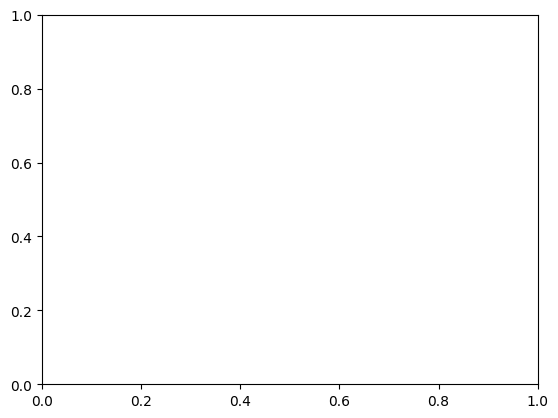

In [70]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Define your functions find_nearest_neighbour, plot_dataset_train, plot_centroids, and find_centroids here.

# Define your points and centroids
points = np.random.rand(30, 2)
centroids = np.random.rand(3, 2)

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    global centroids  # Use global to modify the centroids defined outside the function
    centers = find_nearest_neighbour(points, centroids)
    plot_dataset_train(points, centers, ax)
    plot_centroids(centroids, ax)
    centroids = find_centroids(points, centers)  # Update centroids for next frame

ani = FuncAnimation(fig, update, frames=15, repeat=False)
plt.show()
